The stored spring potential energy is:
$$
V(x) = x^{2} - \alpha x^{3} + 0.1 x^{4} 
$$

now differentiate this with respect to x:

$$
f = -\dfrac{dV(x)}{dx} = - 2x + 3\alpha x^{2} - 0.4x^{3}
$$

At the first node, the only force acting on the particle is the string at 1-2. This means the only force acting between then is:
$$
f_1 = -\dfrac{dV(x_1-x_2-l)}{dx} 
$$

For the other nodes:

$$
f_i = -\dfrac{dV(x_i-x_{i+1}-l)}{dx} -\dfrac{dV(x_{i-1}-x_{i}-l)}{dx}
$$

and use again Newton's law, $f = m\ddot{x}$ gives.

The total energy for the whole system is therefore: 
$$
U = \sum_{i=1}^{N-1}V(x_i - x_{i+1} - l)
$$

And now let's see this in ACTION!!

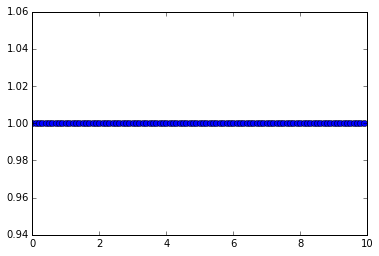

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Declare a mesh
l = 0.1
N = 100
L = (N-1)*l
x = np.linspace(0, L, N)
# plt.figure(figsize=(12,10))
plt.plot(x, np.ones(N),'-o')

In [2]:
def cal_force(temp):
    return -(2.*temp - 3.*alpha*(temp**2) + 0.4*(temp**3))

In [3]:
def cal_potential_energy(chain):
    re = 0.0
    n = chain.size
    for i in range(0, n-1):
        temp = chain[i] - chain[i+1] - l
        re += temp**2 - alpha*(temp**3) + 0.1*(temp**4)
        
    return re

In [4]:
def cal_kinetic_energy(vel):
    results = 0.0
    for vi in vel:
        results += 0.5*m*(vi**2)
    return results

In [5]:
def cal_total_energy(chain, vel):
    return cal_potential_energy(chain) + cal_kinetic_energy(vel)

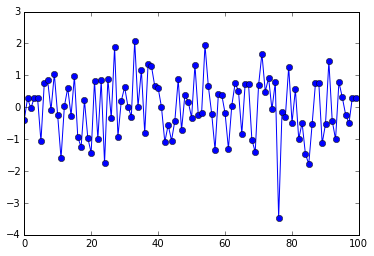

In [6]:
# Now we need to verlet every particle:
T = 600.0
dt = 0.1
num_iter = int(T/dt)
t = 0.0
m = 1.0
alpha = 0.0

# Random initilise of v
# Make sure they have zero mean
v = np.random.normal(0, 1.0, N)
# v[-1] = -np.sum(v[:N-1])
v = v - np.mean(v)
plt.plot(v,'-o')

In [7]:
print cal_total_energy(x, v)
print cal_kinetic_energy(v)
print cal_potential_energy(x)

48.3900964446
44.4142564446
3.97584


In [8]:
net_length = []
total_energy = []
potential_energy = []
kinetic_energy = []
for it in range(num_iter):
    a = np.zeros(N)
    for i in range(N):
        if i==0:
            a[i] = (1.0/m)*cal_force(x[i] - x[i+1] - l)
        elif i==N-1:
            a[i] = -(1.0/m)*cal_force(x[i-1] - x[i] - l)
        else:
            a[i] = (1.0/m)*(cal_force(x[i] - x[i+1] - l) - cal_force(x[i-1] - x[i] - l))

    if it==0:
        # Create a storage
        x_store = x.copy()
        # Euler at the very start
        x = x + v*dt + 0.5*a*dt*dt
        v = v + a*dt
    else:
        # Create a storage
        x_store = np.vstack((x_store, x))
        x = 2*x_store[it] - x_store[it-1] + a*dt*dt
        v = (x - x_store[it])/dt
    
    net_length.append((np.max(x)-np.min(x))/L)
    kinetic_energy.append(cal_kinetic_energy(v))
    potential_energy.append(cal_potential_energy(x))
    total_energy.append(cal_kinetic_energy(v) + cal_potential_energy(x))
    
#     increase time    
#     t += dt

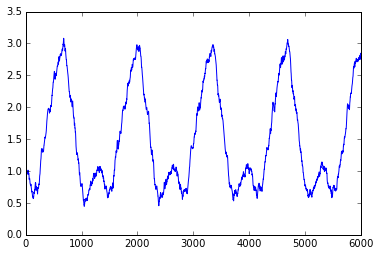

In [9]:
plt.plot(net_length)

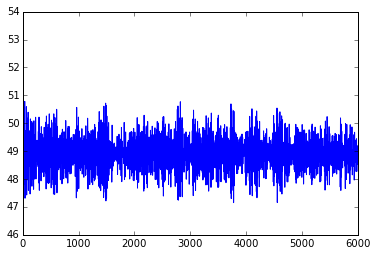

In [10]:
plt.plot(total_energy)

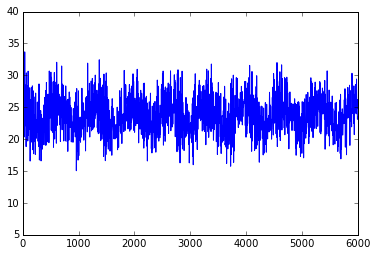

In [11]:
plt.plot(potential_energy)

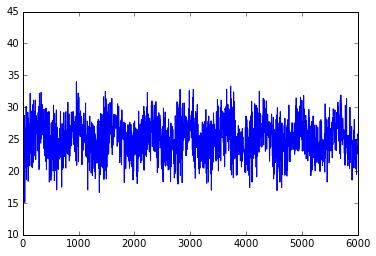

In [12]:
plt.plot(kinetic_energy)

In [13]:
# from JSAnimation.IPython_display import display_animation
# import matplotlib.animation as animation

# fig = plt.figure()
# ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0, L+2.0), ylim=(-0.5, 0.5))
# ax.grid()
# scat = ax.scatter([], [], s=50)
# line, = ax.plot([], [], lw=2)
# time_template = 'time = %.1fs'
# time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
# color_data = np.linspace(0, N, N)

# def animate(i, color_data, scat, line):
#     x = x_store[i]
#     y = np.zeros(x.size)
#     line.set_data(x, y)
#     array = np.vstack((x, y))
#     scat.set_offsets(array.transpose())
#     scat.set_array(color_data)
#     time_text.set_text(time_template%(i*dt))
#     return line, scat, time_text

# def init():
#     line.set_data([], [])
#     scat = ax.scatter([], [], s=50)
#     time_text.set_text('')
#     return line, scat, time_text

# anim = animation.FuncAnimation(fig, animate, frames=xrange(num_iter),
#                               fargs=(color_data, scat, line), blit=False, init_func=init)
    
# Call animation function to display the animation
# display_animation(anim)

In [14]:
# ytemp = np.ones(x.size)
# plt.plot(x_store[4], ytemp, '-o')